In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Loading in the processed data

In [2]:
data <- read_csv("../data/summary.data") %>%
    map_df(rev) %>%
    rowid_to_column("index")
head(data)

Rows: 21 Columns: 4

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): matchId
dbl (3): shrooms_created, shrooms_destroyed, shroom_damage


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



index,matchId,shrooms_created,shrooms_destroyed,shroom_damage
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,NA1_4261355548,60,9,433
2,NA1_4265525691,93,17,3338
3,NA1_4269483383,20,0,464
4,NA1_4269458114,75,3,1699
5,NA1_4269580533,71,8,1062
6,NA1_4271235379,27,5,326


In [3]:
options(repr.plot.width = 15, repr.plot.height = 10)

Creating EDA visualizations for the various Shroom time series

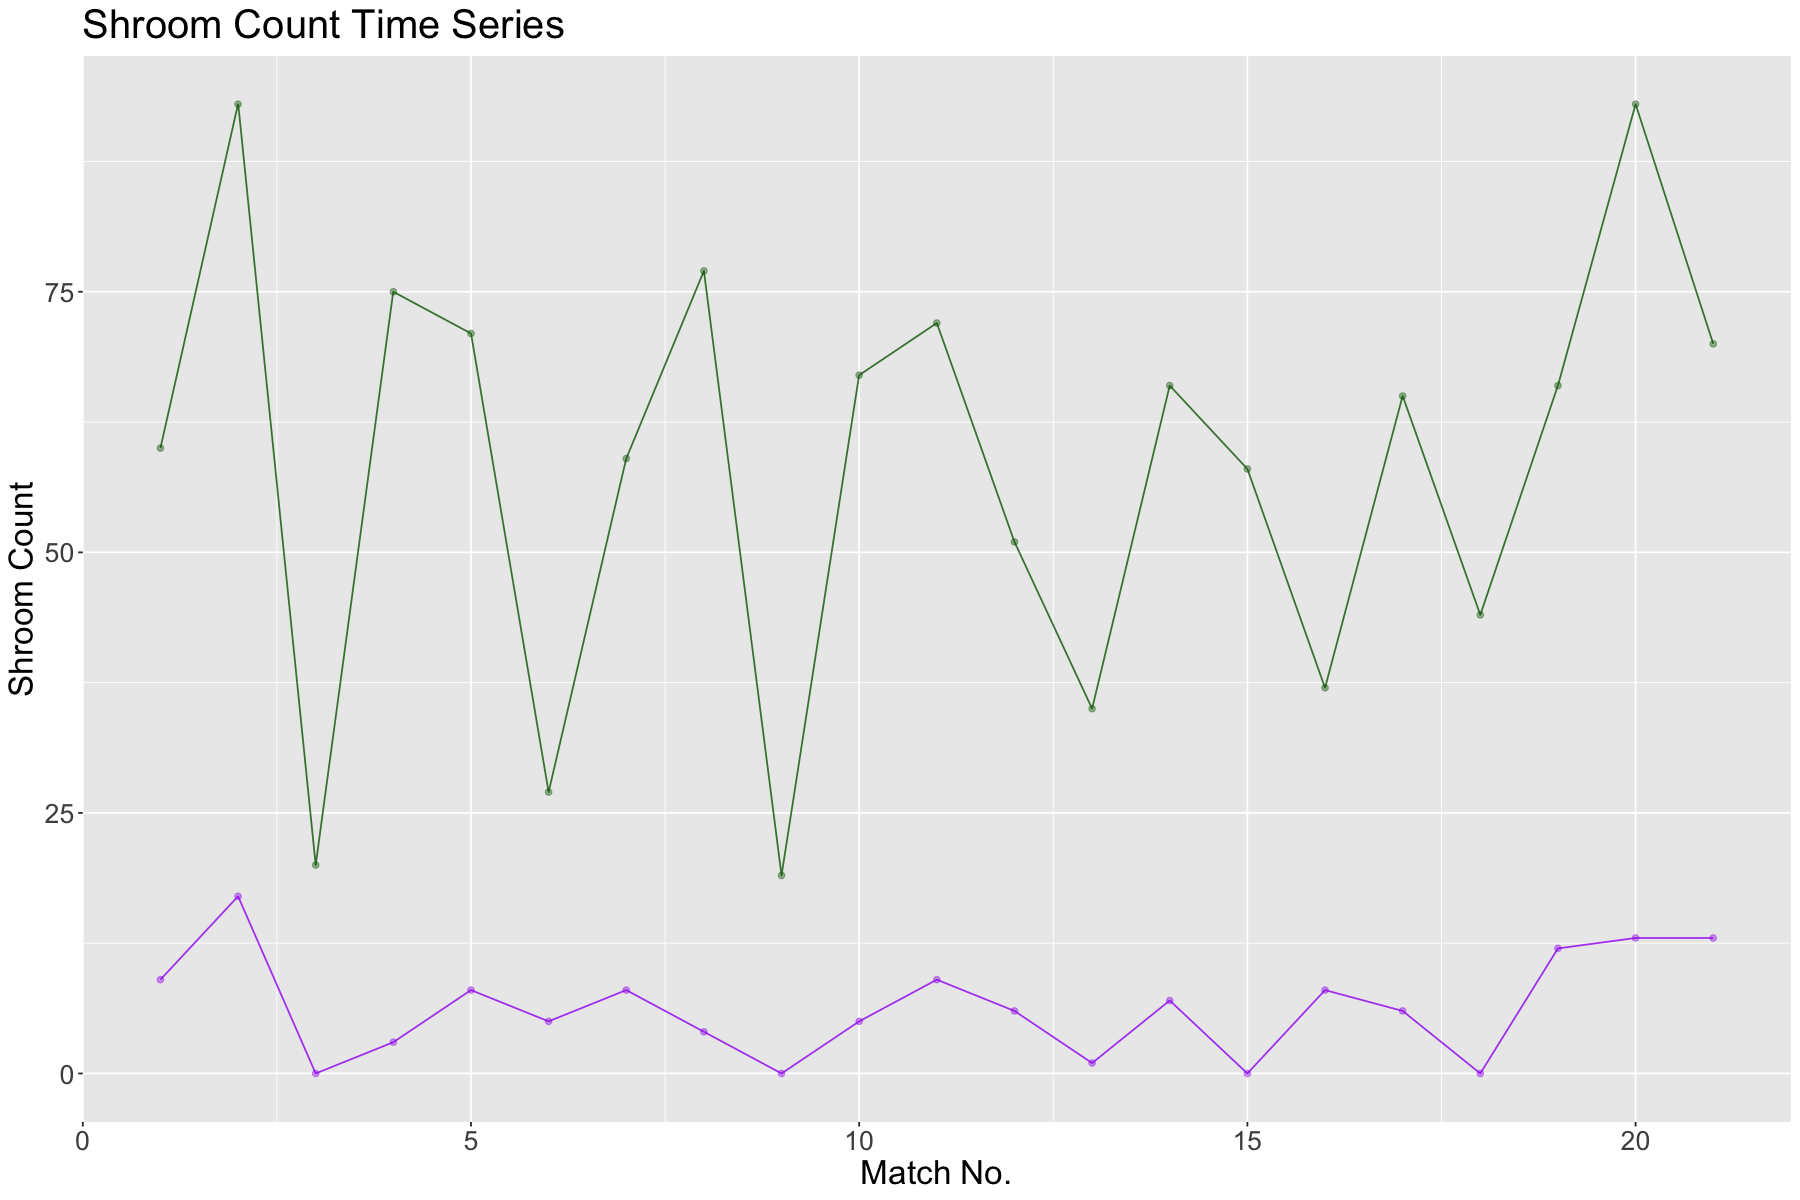

In [4]:
shroom_count <- ggplot(data) +
    geom_point(aes(x=index, y=shrooms_created, color="Shrooms Created"), color = "dark green", alpha = 0.4) +
    geom_line(aes(x=index, y=shrooms_created, color="Shrooms Created"), color = "dark green", alpha = 0.8) +
    geom_point(aes(x=index, y=shrooms_destroyed, color="Shrooms Destroyed"),color = "purple" , alpha = 0.4) +
    geom_line(aes(x=index, y=shrooms_destroyed, color="Shrooms Destroyed"),color = "purple", alpha = 0.8) +
    labs(x = "Match No.", y = "Shroom Count", color = "Shroom Count Source") +
    ggtitle("Shroom Count Time Series") + 
    theme(text = element_text(size = 20))
shroom_count

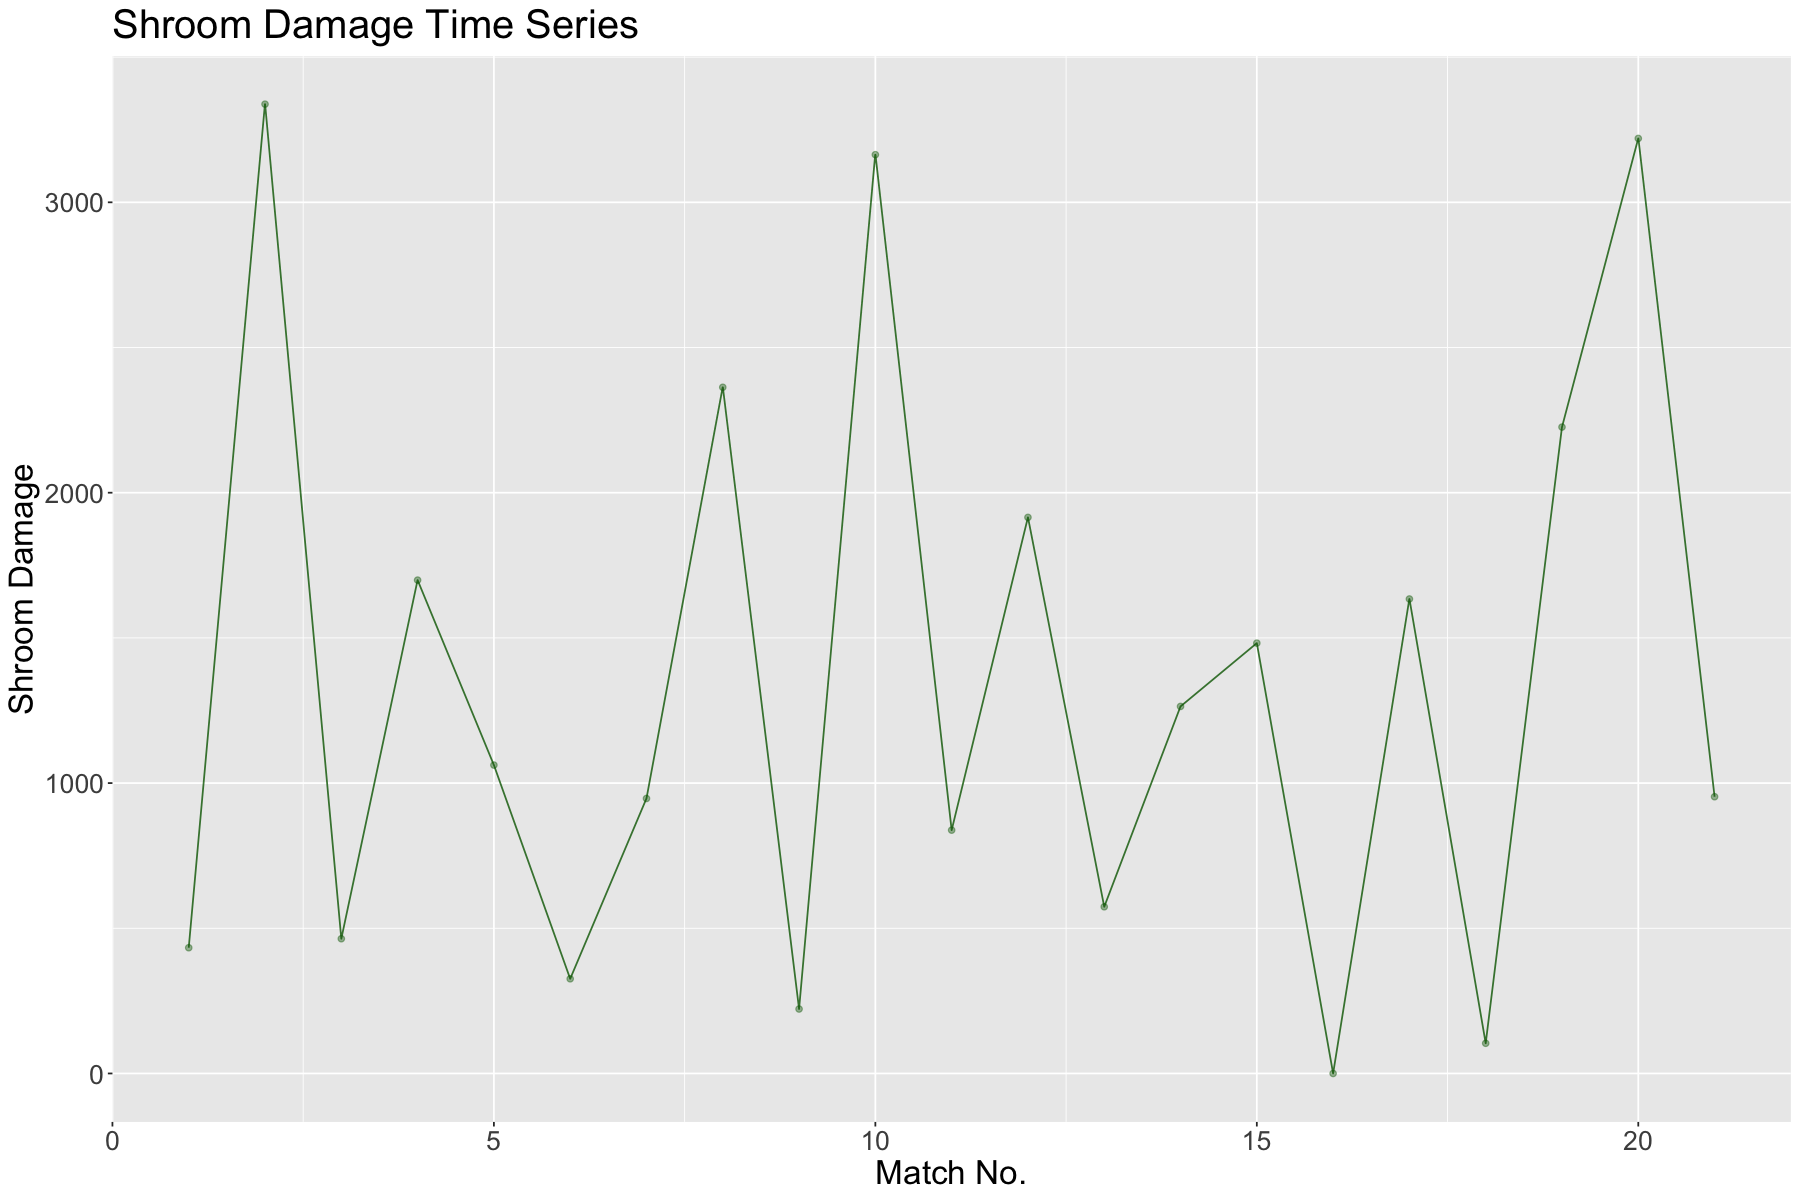

In [5]:
shroom_damage <- ggplot(data) +
    geom_point(aes(x=index, y=shroom_damage), color = "dark green", alpha = 0.4) +
    geom_line(aes(x=index, y=shroom_damage), color = "dark green", alpha = 0.8) +
    labs(x = "Match No.", y = "Shroom Damage") +
    ggtitle("Shroom Damage Time Series") + 
    theme(text = element_text(size = 20))
shroom_damage

From the basic visualizations against time, there does not seem to be a clear seasonal effect or trend between matches. Therefore, it may not be appropriate to use time series regression analysis to determine future progress.

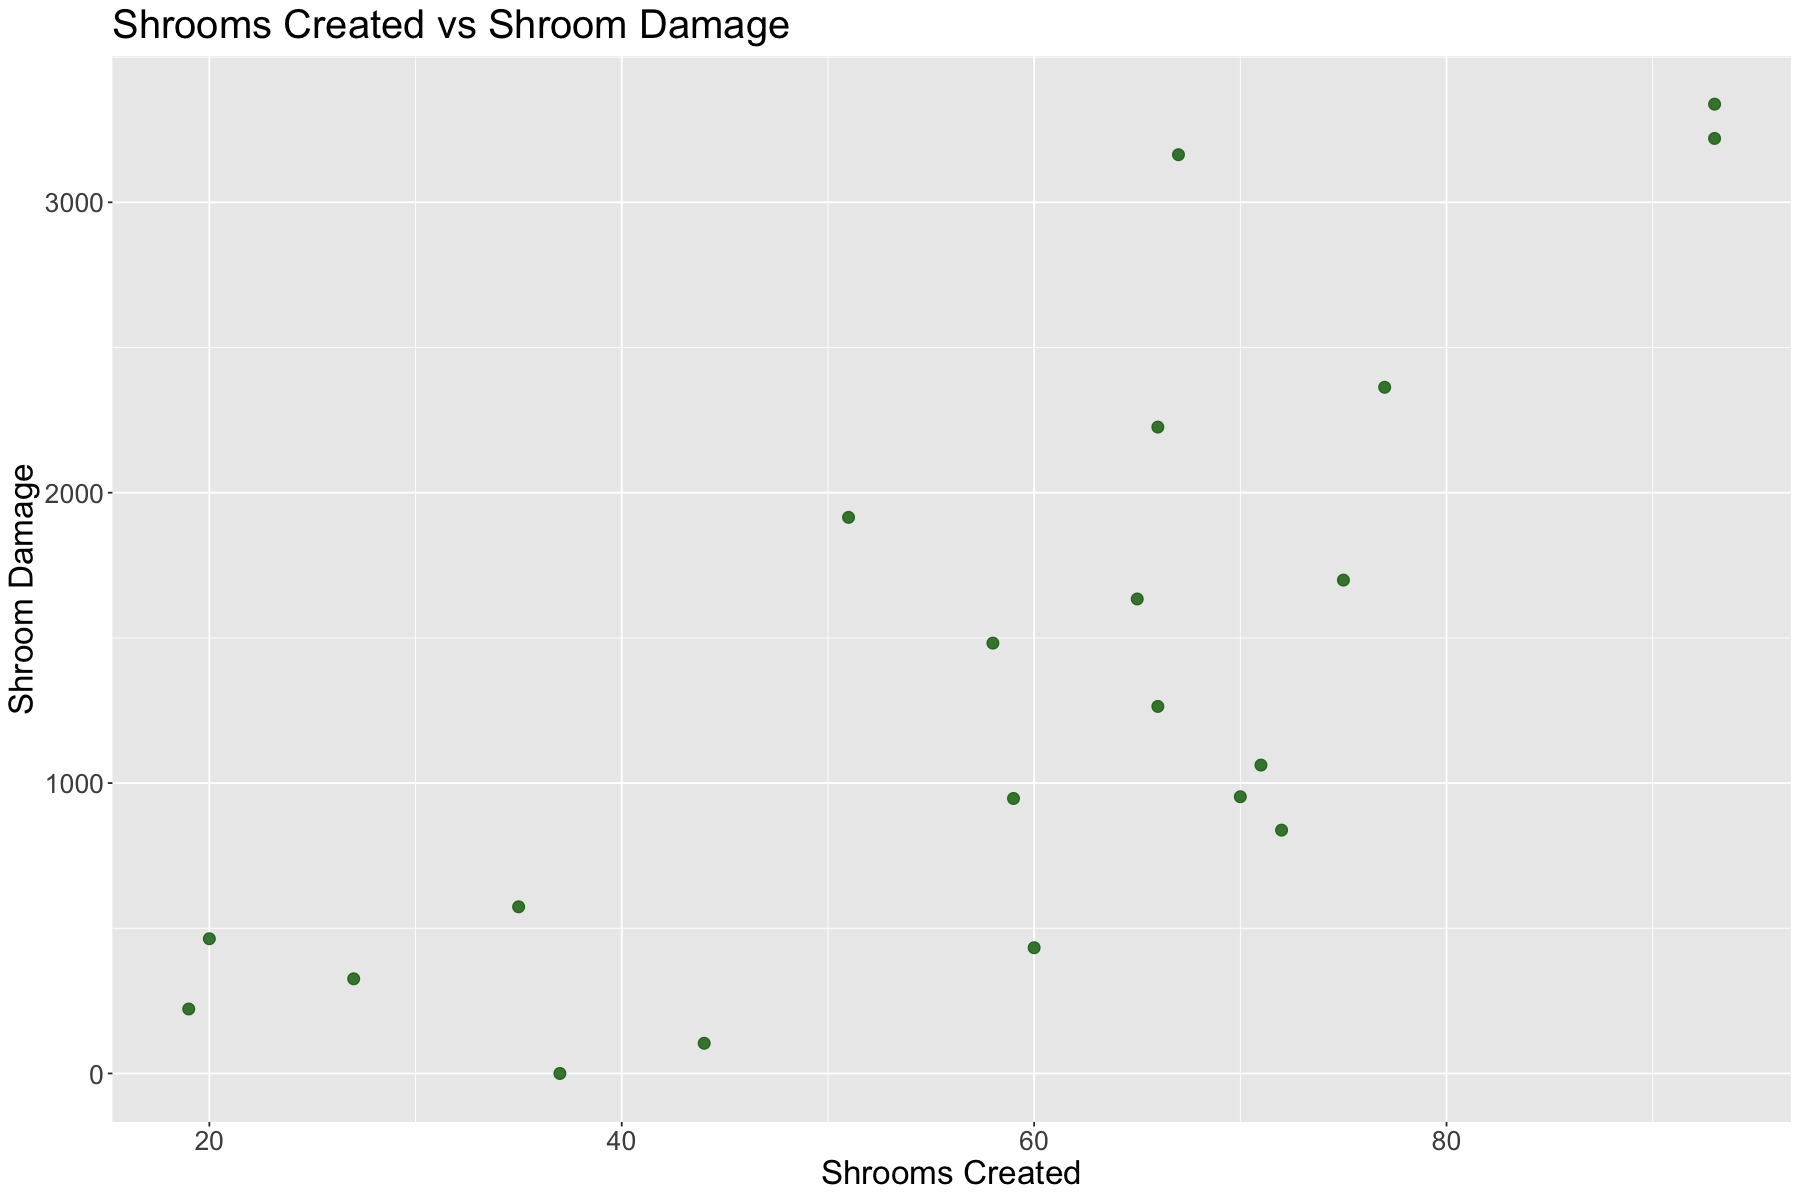

In [12]:
shrooms_created_vs_damage <- ggplot(data) +
    geom_point(aes(x=shrooms_created, y=shroom_damage), color = "dark green", alpha = 0.8, size = 3) +
    labs(x = "Shrooms Created", y = "Shroom Damage") +
    ggtitle("Shrooms Created vs Shroom Damage")+
    theme(text = element_text(size = 20))
shrooms_created_vs_damage

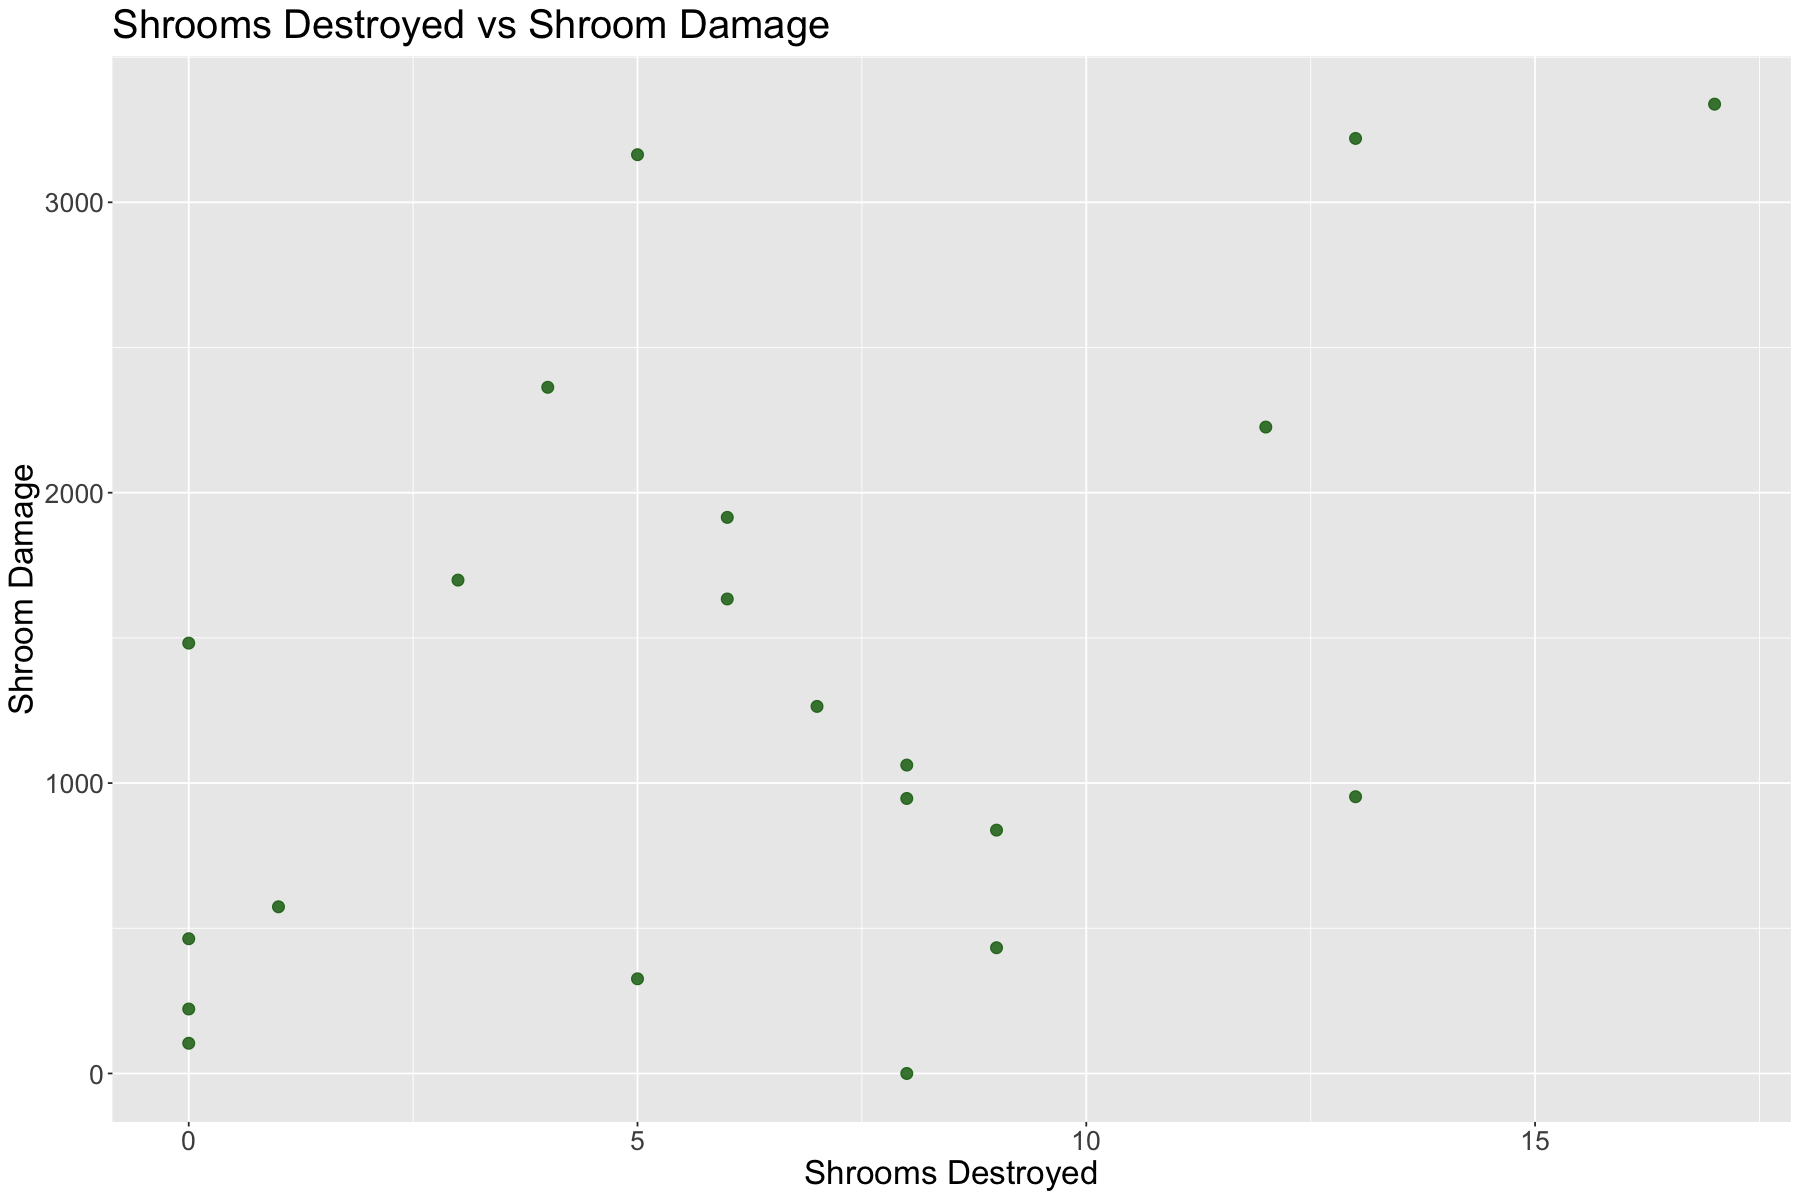

In [13]:
shrooms_destroyed_vs_damage <- ggplot(data) +
    geom_point(aes(x=shrooms_destroyed, y=shroom_damage), color = "dark green", alpha = 0.8, size = 3) +
    labs(x = "Shrooms Destroyed", y = "Shroom Damage") +
    ggtitle("Shrooms Destroyed vs Shroom Damage")+
    theme(text = element_text(size = 20))
shrooms_destroyed_vs_damage

From a quick observation, it seems there is a weak correlation between damage and shrooms created/destroyed. Despite being a weak correlation, it may be useful to analyze this data. 

Since the number of shrooms destroyed is a subset of the number of shrooms placed, they are not independent of one another. Therefore, it does not seem useful to plot an EDA of the two factors.